In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset handling

In [2]:
# importing the dataset
df = pd.read_csv("C:\\Users\\HP\\Titanic survival\\Titanic_survival_project\\dataset\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.size

10692

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

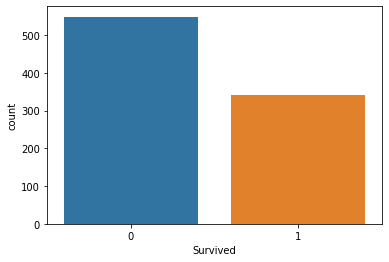

In [8]:
sns.countplot(x='Survived', data =df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

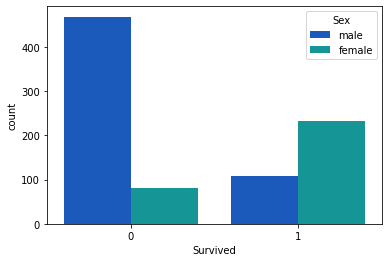

In [9]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'winter')

<AxesSubplot:xlabel='Survived', ylabel='count'>

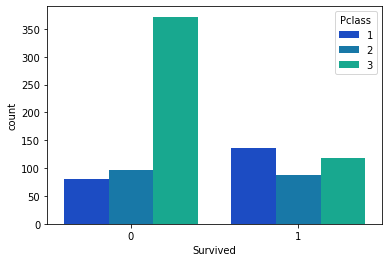

In [10]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'winter')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

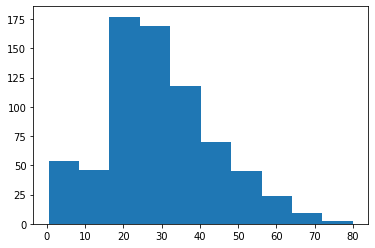

In [11]:
plt.hist(df['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

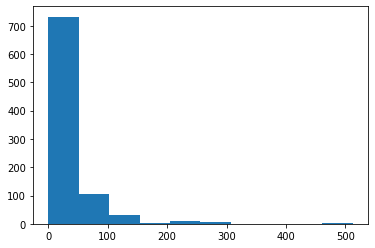

In [12]:
plt.hist(df['Fare'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

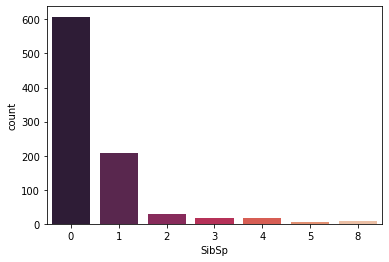

In [13]:
sns.countplot(x = 'SibSp', data = df, palette = 'rocket')

<AxesSubplot:>

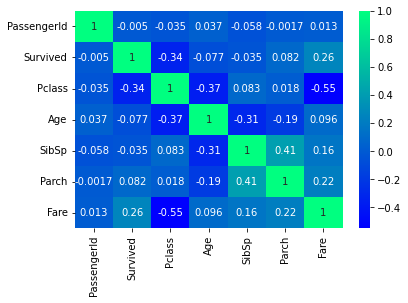

In [14]:
sns.heatmap(df.corr(), cmap = 'winter', annot = True)

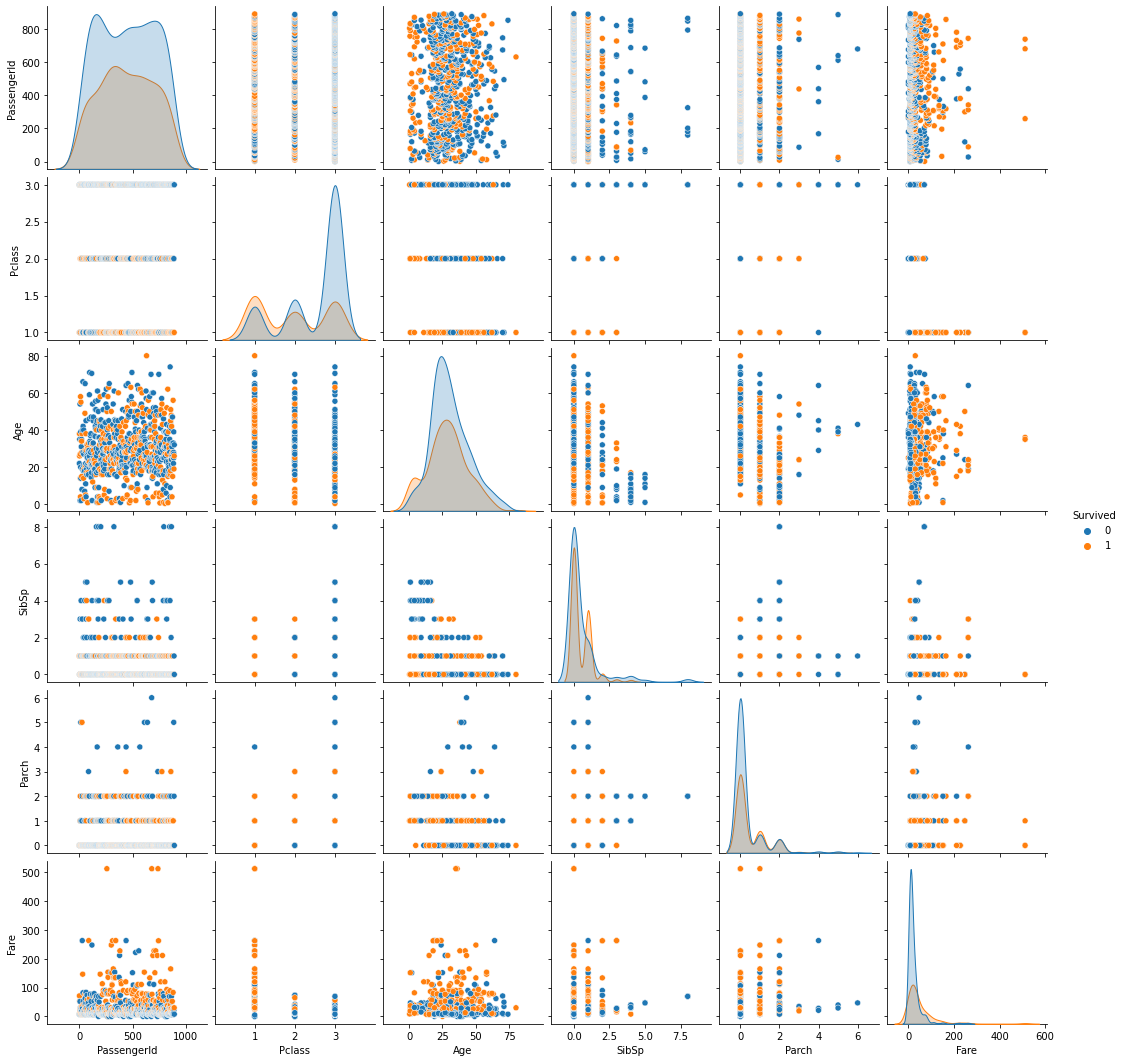

In [15]:
sns.pairplot(data = df, hue= 'Survived')

### Data Balancing

In [16]:
# !pip install imblearn

In [17]:
from collections import Counter
from imblearn import under_sampling, over_sampling

In [18]:
sorted(Counter(df['Survived']).items())

[(0, 549), (1, 342)]

In [19]:
count_class_0, count_class_1 = df.Survived.value_counts()

#divide by class
df_class_0 = df[df['Survived'] ==0]
df_class_1 = df[df['Survived'] ==1]

In [20]:
count_class_0, count_class_1 

(549, 342)

In [21]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_balanced = pd.concat([df_class_0, df_class_1_over],axis=0)
print('Random over-sampling')
print(df_balanced.Survived.value_counts())

Random over-sampling
1    549
0    549
Name: Survived, dtype: int64


In [22]:
df_balanced.shape

(1098, 12)

# Data wranglilng

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

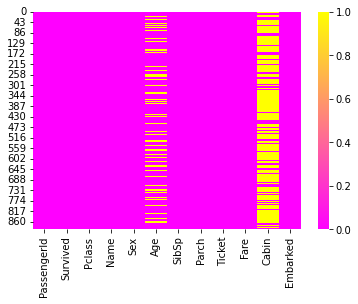

In [24]:
sns.heatmap(df.isnull(), cmap = 'spring')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

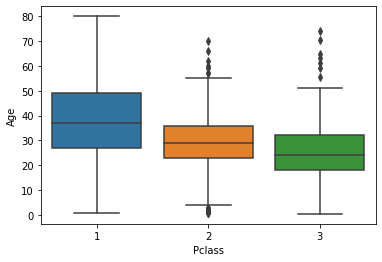

In [25]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_balanced.drop('Cabin', axis = 1, inplace = True)

In [28]:
df_balanced.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


In [29]:
df_balanced.dropna(inplace = True)

<AxesSubplot:>

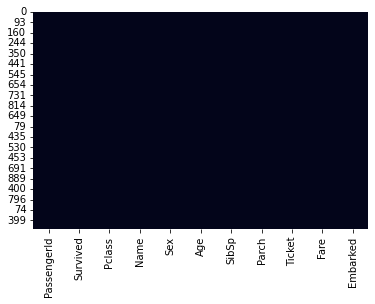

In [30]:
sns.heatmap(df_balanced.isnull(),cbar = False)

In [31]:
df_balanced.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
df_balanced.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S


In [33]:
df_balanced['Embarked'].unique()

array(['S', 'Q', 'C'], dtype=object)

In [34]:
df_balanced['Sex'].unique()

array(['male', 'female'], dtype=object)

In [35]:
df_balanced['PassengerId'].unique()

array([  1,   5,   7,   8,  13,  14,  15,  17,  19,  21,  25,  28,  31,
        34,  35,  36,  38,  39,  41,  42,  50,  51,  52,  55,  58,  60,
        61,  63,  64,  68,  70,  71,  72,  73,  74,  76,  81,  84,  87,
        90,  91,  92,  93,  94,  95,  97, 100, 101, 103, 104, 105, 106,
       109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123,
       125, 130, 131, 132, 133, 135, 136, 138, 139, 140, 144, 145, 146,
       148, 149, 150, 151, 153, 154, 156, 158, 161, 163, 164, 165, 168,
       170, 171, 172, 174, 175, 176, 178, 179, 180, 183, 189, 190, 192,
       198, 200, 201, 203, 204, 206, 207, 211, 213, 214, 218, 220, 222,
       223, 226, 228, 229, 232, 233, 235, 237, 239, 240, 243, 244, 245,
       246, 247, 250, 252, 253, 254, 255, 263, 264, 266, 267, 274, 277,
       279, 281, 282, 283, 286, 288, 293, 294, 295, 297, 298, 303, 309,
       313, 314, 315, 318, 321, 322, 327, 332, 333, 334, 337, 340, 343,
       344, 345, 350, 351, 353, 354, 356, 358, 361, 362, 363, 36

In [36]:
# df_balanced['Survived'].unique()

In [37]:
df_balanced['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [38]:
df_balanced['Age'].unique()

array([22.  , 35.  , 54.  ,  2.  , 20.  , 39.  , 14.  , 31.  ,  8.  ,
       19.  , 40.  , 66.  , 28.  , 42.  , 21.  , 18.  , 27.  ,  7.  ,
       65.  , 28.5 , 11.  , 45.  ,  4.  , 26.  , 32.  , 16.  , 25.  ,
       24.  , 29.  , 46.  , 59.  , 71.  , 34.  , 33.  , 37.  , 38.  ,
       47.  , 14.5 , 17.  , 70.5 , 32.5 , 23.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 30.  , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 23.5 , 43.  , 15.  ,  3.  ,
       10.  , 64.  , 48.  , 58.  , 55.  , 49.  , 57.  , 70.  , 24.5 ,
       60.  , 30.5 ,  6.  , 34.5 , 74.  ,  5.  , 53.  ,  0.75, 63.  ,
        0.42,  0.83,  0.92, 13.  , 12.  , 80.  ])

In [39]:
df_balanced = df_balanced.fillna(df_balanced['Age'].mean())

In [40]:
df_balanced['Age'].unique()

array([22.  , 35.  , 54.  ,  2.  , 20.  , 39.  , 14.  , 31.  ,  8.  ,
       19.  , 40.  , 66.  , 28.  , 42.  , 21.  , 18.  , 27.  ,  7.  ,
       65.  , 28.5 , 11.  , 45.  ,  4.  , 26.  , 32.  , 16.  , 25.  ,
       24.  , 29.  , 46.  , 59.  , 71.  , 34.  , 33.  , 37.  , 38.  ,
       47.  , 14.5 , 17.  , 70.5 , 32.5 , 23.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 30.  , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 23.5 , 43.  , 15.  ,  3.  ,
       10.  , 64.  , 48.  , 58.  , 55.  , 49.  , 57.  , 70.  , 24.5 ,
       60.  , 30.5 ,  6.  , 34.5 , 74.  ,  5.  , 53.  ,  0.75, 63.  ,
        0.42,  0.83,  0.92, 13.  , 12.  , 80.  ])

In [41]:
df_balanced['Fare'].unique()

array([  7.25  ,   8.05  ,  51.8625,  21.075 ,  31.275 ,   7.8542,
        29.125 ,  18.    ,  26.    , 263.    ,  27.7208,  10.5   ,
        82.1708,  52.    ,   9.475 ,  21.    ,  17.8   ,  39.6875,
         7.8   ,  61.9792,   7.2292,  46.9   ,  83.475 ,  27.9   ,
         8.1583,   8.6625,  73.5   ,  14.4542,   7.65  ,   9.    ,
        47.1   ,  34.375 ,  61.175 ,  20.575 ,  34.6542,   7.8958,
        77.2875,   8.6542,   7.925 ,   9.825 ,  14.4583,   7.75  ,
       247.5208,  30.0708,   6.975 ,   7.05  ,  14.5   ,  13.    ,
        15.0458,  53.1   ,   9.2167,  79.2   ,   6.75  ,  11.5   ,
        36.75  ,  12.525 ,  61.3792,  16.1   ,   7.775 ,  56.4958,
        33.5   ,  30.6958,  28.7125,   0.    ,  31.3875,  15.5   ,
         8.4042,   9.5   ,   6.4958,   7.225 ,  10.4625,  15.85  ,
        27.    ,   9.35  ,  13.5   ,  12.275 ,   7.125 ,  90.    ,
        26.55  ,  20.2125,  79.65  ,  29.7   ,  12.875 ,   8.85  ,
       151.55  ,  24.    ,  26.25  ,  14.    ,   6.2375,  28.5

In [42]:
df_balanced = df_balanced.fillna(df_balanced['Fare'].mean())

In [43]:
df_balanced['Fare'].unique()

array([  7.25  ,   8.05  ,  51.8625,  21.075 ,  31.275 ,   7.8542,
        29.125 ,  18.    ,  26.    , 263.    ,  27.7208,  10.5   ,
        82.1708,  52.    ,   9.475 ,  21.    ,  17.8   ,  39.6875,
         7.8   ,  61.9792,   7.2292,  46.9   ,  83.475 ,  27.9   ,
         8.1583,   8.6625,  73.5   ,  14.4542,   7.65  ,   9.    ,
        47.1   ,  34.375 ,  61.175 ,  20.575 ,  34.6542,   7.8958,
        77.2875,   8.6542,   7.925 ,   9.825 ,  14.4583,   7.75  ,
       247.5208,  30.0708,   6.975 ,   7.05  ,  14.5   ,  13.    ,
        15.0458,  53.1   ,   9.2167,  79.2   ,   6.75  ,  11.5   ,
        36.75  ,  12.525 ,  61.3792,  16.1   ,   7.775 ,  56.4958,
        33.5   ,  30.6958,  28.7125,   0.    ,  31.3875,  15.5   ,
         8.4042,   9.5   ,   6.4958,   7.225 ,  10.4625,  15.85  ,
        27.    ,   9.35  ,  13.5   ,  12.275 ,   7.125 ,  90.    ,
        26.55  ,  20.2125,  79.65  ,  29.7   ,  12.875 ,   8.85  ,
       151.55  ,  24.    ,  26.25  ,  14.    ,   6.2375,  28.5

In [44]:
df_balanced['Sex'].unique()

array(['male', 'female'], dtype=object)

In [45]:
gender = {'male':1, 'female':0}
station = {'S':0, 'C':1, 'Q':2}
df_balanced['Sex'] = df_balanced['Sex'].map(gender)
df_balanced['Embarked'] = df_balanced['Embarked'].map(station)

In [46]:
df_balanced.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0
12,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,0


In [47]:
df_balanced.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0
12,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,0


In [48]:
df_balanced.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [49]:
df_balanced.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
4,0,3,1,35.0,0,0,8.0500,0
6,0,1,1,54.0,0,0,51.8625,0
7,0,3,1,2.0,3,1,21.0750,0
12,0,3,1,20.0,0,0,8.0500,0


### preparing test dataset

In [51]:
df1 = pd.read_csv("C:\\Users\\HP\\Titanic survival\\Titanic_survival_project\\dataset\\test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
df1['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [53]:
df1['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [54]:
df1['Sex'].unique()

array(['male', 'female'], dtype=object)

In [55]:
df1['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [56]:
df1['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [57]:
df1['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [58]:
df1['Fare'].isna().sum()

1

In [59]:
df1['Fare'].mean()

35.6271884892086

In [60]:
df1 = df1.fillna(df1['Fare'].mean())

In [61]:
df1['Fare'].unique()

array([  7.8292    ,   7.        ,   9.6875    ,   8.6625    ,
        12.2875    ,   9.225     ,   7.6292    ,  29.        ,
         7.2292    ,  24.15      ,   7.8958    ,  26.        ,
        82.2667    ,  61.175     ,  27.7208    ,  12.35      ,
         7.225     ,   7.925     ,  59.4       ,   3.1708    ,
        31.6833    ,  61.3792    , 262.375     ,  14.5       ,
        61.9792    ,  30.5       ,  21.6792    ,  31.5       ,
        20.575     ,  23.45      ,  57.75      ,   8.05      ,
         9.5       ,  56.4958    ,  13.4167    ,  26.55      ,
         7.85      ,  13.        ,  52.5542    ,  29.7       ,
         7.75      ,  76.2917    ,  15.9       ,  60.        ,
        15.0333    ,  23.        , 263.        ,  15.5792    ,
        29.125     ,   7.65      ,  16.1       ,  13.5       ,
         7.725     ,  21.        ,   7.8792    ,  42.4       ,
        28.5375    , 211.5       ,  25.7       ,  15.2458    ,
       221.7792    ,  10.7083    ,  14.4542    ,  13.9 

In [62]:
# df1.drop('Cabin', axis = 1, inplace = True)

In [63]:
gen = {'male':1, 'female':0}
stations = {'S':0, 'C':1, 'Q':2}
df1['Sex'] = df1['Sex'].map(gen)
df1['Embarked'] = df1['Embarked'].map(stations)

In [64]:
df1.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [65]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [66]:
df1.shape

(418, 7)

# model training - Logistic Regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [68]:
# train data
x = df_balanced.drop('Survived', axis = 1)
y = df_balanced['Survived']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 4)

In [70]:
le = LogisticRegression()

In [71]:
le.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [72]:
Lr_prediction = le.predict(x_test)

In [73]:
print(classification_report(y_test, Lr_prediction))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       133
           1       0.80      0.79      0.80       164

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297



In [74]:
confusion_matrix(y_test, Lr_prediction)

array([[101,  32],
       [ 34, 130]], dtype=int64)

In [75]:
accuracy_score(y_test, Lr_prediction)

0.7777777777777778

### Testing model on test dataset

In [76]:
le = LogisticRegression()

In [77]:
le.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
Lr_predicted = le.predict(df1)

In [79]:
Lr_predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [80]:
df2 = df1.copy()

In [81]:
df2['Predicted'] = Lr_predicted

In [82]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


# model training - KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 4)

In [85]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [86]:
KNN_prediction = model.predict(x_test)

In [87]:
print(classification_report(y_test, KNN_prediction))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       133
           1       0.67      0.69      0.68       164

    accuracy                           0.64       297
   macro avg       0.64      0.64      0.64       297
weighted avg       0.64      0.64      0.64       297



In [88]:
confusion_matrix(y_test, KNN_prediction)

array([[ 78,  55],
       [ 51, 113]], dtype=int64)

In [89]:
accuracy_score(y_test, KNN_prediction)

0.6430976430976431

### Testing model on test dataset

In [90]:
KNN_predicted = model.predict(df1)

In [91]:
KNN_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

In [92]:
df3 = df1.copy()

In [93]:
df3['Predicted'] = KNN_predicted

In [94]:
df3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,0,0
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,0,0
4,3,0,22.0,1,1,12.2875,0,0


# model training - Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg

In [96]:
clf = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [97]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [98]:
DecTree_prediction = clf.predict(x_test)

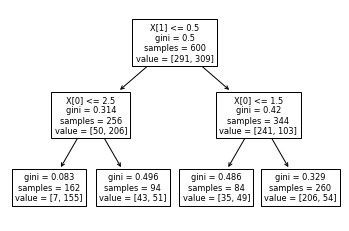

In [99]:
tree.plot_tree(clf);

In [100]:
df_balanced.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

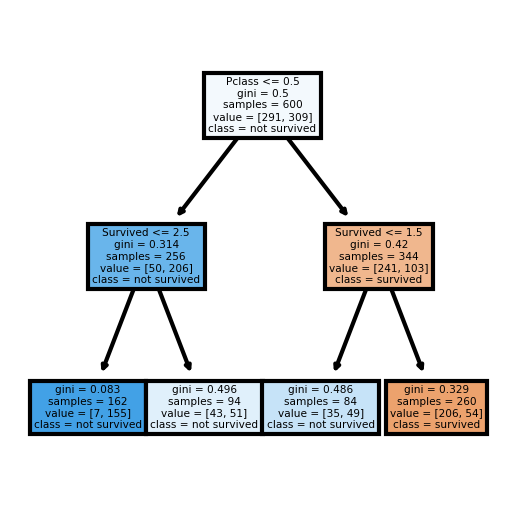

In [134]:
fn = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
cn = ['survived', 'not survived']

fig, axes = plt.subplots(nrows = 1, ncols =1, figsize =(2,2), dpi = 300)
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True);

In [102]:
print(classification_report(y_test, DecTree_prediction))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       133
           1       0.77      0.84      0.80       164

    accuracy                           0.77       297
   macro avg       0.77      0.77      0.77       297
weighted avg       0.77      0.77      0.77       297



In [103]:
confusion_matrix(y_test, DecTree_prediction)

array([[ 93,  40],
       [ 27, 137]], dtype=int64)

In [104]:
accuracy_score(y_test, DecTree_prediction)

0.7744107744107744

### Testing model on test dataset

In [105]:
DecTree_predicted = model.predict(df1)

In [106]:
DecTree_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

In [107]:
df4 = df1.copy()

In [108]:
df4['Predicted'] = DecTree_predicted

In [109]:
df4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,0,0
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,0,0
4,3,0,22.0,1,1,12.2875,0,0


# model training - Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model = RandomForestClassifier(n_estimators=40)

In [112]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [113]:
Rf_prediction = model.predict(x_test)

In [114]:
print(classification_report(y_test, Rf_prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       133
           1       0.91      0.86      0.88       164

    accuracy                           0.88       297
   macro avg       0.87      0.88      0.87       297
weighted avg       0.88      0.88      0.88       297



In [115]:
cm = confusion_matrix(y_test, Rf_prediction)
cm

array([[119,  14],
       [ 23, 141]], dtype=int64)

In [116]:
accuracy_score(y_test, Rf_prediction)

0.8754208754208754

### Testing model on test dataset

In [117]:
Rf_predicted = model.predict(df1)

In [118]:
Rf_predicted

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [119]:
df5 = df1.copy()

In [120]:
df5['Predicted'] = Rf_predicted

In [121]:
df5.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,0,0
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,0


# model training - SVM

In [122]:
from sklearn.svm import SVC

In [123]:
model = SVC()

In [124]:
model.fit(x_train, y_train)

SVC()

In [125]:
Svm_prediction = model.predict(x_test)

In [126]:
print(classification_report(y_test, Svm_prediction))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64       133
           1       0.71      0.67      0.69       164

    accuracy                           0.66       297
   macro avg       0.66      0.66      0.66       297
weighted avg       0.67      0.66      0.66       297



In [127]:
confusion_matrix(y_test, Svm_prediction)

array([[ 87,  46],
       [ 54, 110]], dtype=int64)

In [128]:
accuracy_score(y_test, Svm_prediction)

0.6632996632996633

### Testing model on test dataset

In [129]:
Svm_predicted = model.predict(df1)

In [130]:
Svm_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [131]:
df6 = df1.copy()

In [132]:
df6['Predicted'] = Svm_predicted

In [133]:
df6.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,0,0
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,0,0
4,3,0,22.0,1,1,12.2875,0,0
